# This File is to look at rider behaviour for those picked up from LaGuard Airport

In [92]:
# Import Libraries and Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from Util import merge_with_taxi_data

In [29]:
# Read the lyft_Dec_23.parquet file into a DataFrame.
full_lyft_df=pd.read_parquet("Resources/lyft_Dec_23_all_data.parquet")
# Display the first 5 rows of the DataFrame.
full_lyft_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
0,2023-12-01 00:00:00,2023-12-01 00:25:06,130,216,3.882,1506,14.17,0.00,0.39,1.26,0.00,0.0,10.0,19.43,25.82
1,2023-12-01 00:00:00,2023-12-01 00:25:31,170,61,8.530,1531,37.25,2.24,1.08,3.48,2.75,0.0,0.0,25.80,46.80
2,2023-12-01 00:00:00,2023-12-01 01:05:08,158,265,18.970,3908,59.29,22.44,2.25,0.00,0.00,0.0,0.0,67.70,83.98
3,2023-12-01 00:00:01,2023-12-01 00:19:44,238,185,10.432,1183,28.39,0.24,0.79,2.54,2.75,0.0,0.0,25.00,34.71
4,2023-12-01 00:00:01,2023-12-01 00:22:25,216,61,9.309,1344,29.56,0.00,0.81,2.62,0.00,0.0,0.0,25.05,32.99


In [30]:
full_lyft_df.set_index("pickup_datetime", inplace=True, drop=False)  
full_lyft_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
pickup_datetime,,,,,,,,,,,,,,,
2023-12-01 00:00:00,2023-12-01 00:00:00,2023-12-01 00:25:06,130,216,3.882,1506,14.17,0.00,0.39,1.26,0.00,0.0,10.0,19.43,25.82
2023-12-01 00:00:00,2023-12-01 00:00:00,2023-12-01 00:25:31,170,61,8.530,1531,37.25,2.24,1.08,3.48,2.75,0.0,0.0,25.80,46.80
2023-12-01 00:00:00,2023-12-01 00:00:00,2023-12-01 01:05:08,158,265,18.970,3908,59.29,22.44,2.25,0.00,0.00,0.0,0.0,67.70,83.98
2023-12-01 00:00:01,2023-12-01 00:00:01,2023-12-01 00:19:44,238,185,10.432,1183,28.39,0.24,0.79,2.54,2.75,0.0,0.0,25.00,34.71
2023-12-01 00:00:01,2023-12-01 00:00:01,2023-12-01 00:22:25,216,61,9.309,1344,29.56,0.00,0.81,2.62,0.00,0.0,0.0,25.05,32.99


In [31]:
# Merge the lyft data with the taxi data via the merge_with_taxi_data from Util.py.
full_lga_locations_df = merge_with_taxi_data(full_lyft_df)
full_lga_locations_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,Pickup_Borough,Pickup_Zone,DOLocationID,Dropoff_Borough,Dropoff_Zone,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
0,2023-12-01 00:00:00,2023-12-01 00:25:06,130,Queens,Jamaica,216,Queens,South Ozone Park,3.882,1506,14.17,0.00,0.39,1.26,0.00,0.0,10.0,19.43,25.82
1,2023-12-01 00:00:00,2023-12-01 00:25:31,170,Manhattan,Murray Hill,61,Brooklyn,Crown Heights North,8.530,1531,37.25,2.24,1.08,3.48,2.75,0.0,0.0,25.80,46.80
2,2023-12-01 00:00:00,2023-12-01 01:05:08,158,Manhattan,Meatpacking/West Village West,265,NaN,Outside of NYC,18.970,3908,59.29,22.44,2.25,0.00,0.00,0.0,0.0,67.70,83.98
3,2023-12-01 00:00:01,2023-12-01 00:19:44,238,Manhattan,Upper West Side North,185,Bronx,Pelham Parkway,10.432,1183,28.39,0.24,0.79,2.54,2.75,0.0,0.0,25.00,34.71
4,2023-12-01 00:00:01,2023-12-01 00:22:25,216,Queens,South Ozone Park,61,Brooklyn,Crown Heights North,9.309,1344,29.56,0.00,0.81,2.62,0.00,0.0,0.0,25.05,32.99


In [32]:
# Convert trip_time to minutes from seconds
full_lga_locations_df["trip_time"]=full_lga_locations_df["trip_time"]/60

In [33]:
full_lga_locations_df.set_index("pickup_datetime")

,dropoff_datetime,PULocationID,Pickup_Borough,Pickup_Zone,DOLocationID,Dropoff_Borough,Dropoff_Zone,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
pickup_datetime,,,,,,,,,,,,,,,,,,
2023-12-01 00:00:00,2023-12-01 00:25:06,130,Queens,Jamaica,216,Queens,South Ozone Park,3.882,25.100000,14.17,0.00,0.39,1.26,0.00,0.0,10.0,19.43,25.82
2023-12-01 00:00:00,2023-12-01 00:25:31,170,Manhattan,Murray Hill,61,Brooklyn,Crown Heights North,8.530,25.516667,37.25,2.24,1.08,3.48,2.75,0.0,0.0,25.80,46.80
2023-12-01 00:00:00,2023-12-01 01:05:08,158,Manhattan,Meatpacking/West Village West,265,NaN,Outside of NYC,18.970,65.133333,59.29,22.44,2.25,0.00,0.00,0.0,0.0,67.70,83.98
2023-12-01 00:00:01,2023-12-01 00:19:44,238,Manhattan,Upper West Side North,185,Bronx,Pelham Parkway,10.432,19.716667,28.39,0.24,0.79,2.54,2.75,0.0,0.0,25.00,34.71
2023-12-01 00:00:01,2023-12-01 00:22:25,216,Queens,South Ozone Park,61,Brooklyn,Crown Heights North,9.309,22.400000,29.56,0.00,0.81,2.62,0.00,0.0,0.0,25.05,32.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 23:59:57,2024-01-01 00:16:25,170,Manhattan,Murray Hill,7,Queens,Astoria,4.812,16.466667,49.82,2.52,1.40,4.52,5.50,0.0,0.0,17.48,63.76
2023-12-31 23:59:58,2024-01-01 00:30:02,259,Bronx,Woodlawn/Wakefield,48,Manhattan,Clinton East,15.115,30.066667,95.84,1.68,2.18,7.02,5.50,0.0,10.0,37.09,122.22
2023-12-31 23:59:58,2024-01-01 00:18:13,177,Brooklyn,Ocean Hill,62,Brooklyn,Crown Heights South,2.645,18.250000,15.22,0.00,0.42,1.35,0.00,0.0,4.0,13.90,20.99


## Analyzing trends for LGA (from Common_Trends.ipynb)

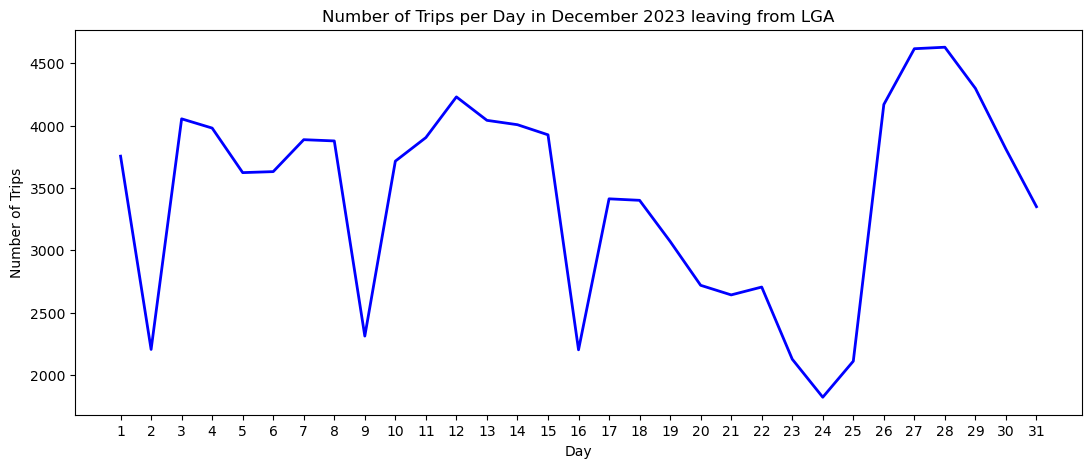

In [130]:
# Setting df to pick up location of LaGuardia (LGA) LocationID=138
lga_df=full_lga_locations_df.loc[full_lga_locations_df['PULocationID'].isin([138])]
lga_df.set_index("pickup_datetime",inplace=True)
jfk_df=full_lga_locations_df.loc[full_lga_locations_df['PULocationID'].isin([132])]
jfk_df.set_index("pickup_datetime",inplace=True)

#First plot Number of Trips per day from LGA
lga_df["DOLocationID"].groupby(lga_df.index.day).count().plot(figsize=(13, 5), color="blue", linewidth=2)
plt.title("Number of Trips per Day in December 2023 leaving from LGA")
plt.xlabel("Day")
plt.xticks(np.arange(1, 32, 1))
plt.ylabel("Number of Trips")
plt.show()

Note that 2nd, 9th, 16th, 23rd, and 24th have the lowest numbers of trips.

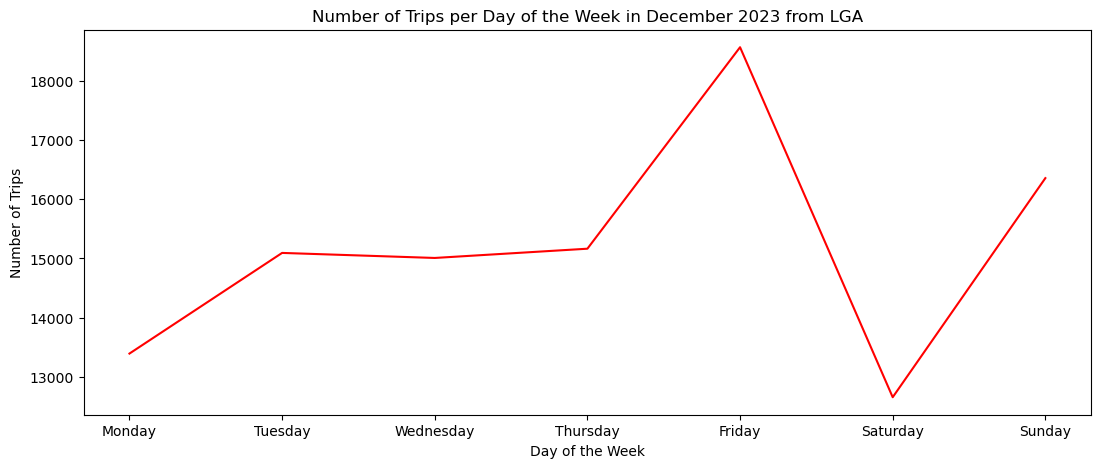

In [36]:
lga_df.groupby(lga_df.index.dayofweek)["trip_time"].count().plot(figsize=(13, 5), color="red")
plt.title("Number of Trips per Day of the Week in December")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trips")
plt.xticks(np.arange(0, 7, 1), ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

As seen of Day per week, Saturday, (2nd, 9th, 16th, 23rd) have the least amount of trips. The 30th was the only Saturday to be outside this trend, due to being the day before New Years Eve.
Note that New Years Eve is a broader holiday than Christmas Eve, so this could contribute to the higher traffic if comparing the 23rd and the 30th.

30th of December is the only Saturday outside the norm of having the least trips on Saturday, possibly due to the Ball dropping for New Years Eve on the 31st.

The two graphs for 8th and 9th of December 2023 are to illustrate the difference in the amount of trips taken from LGA between a respective example of Friday and Saturday. Friday has the highest amount of trips taken and Saturday has the least amount of trips taken. The total trips of the 8th, Friday, was 3,877 while the 9th, Saturday, was 2,313. This trend is echoed all other weeks except for the last week of December. This trend seems to be driven by the personal interest of people going from the LGA on Saturdays. The prime example of this is the amount of trips on 30th since people are interested in seeing the Times Square Ball Drop. 

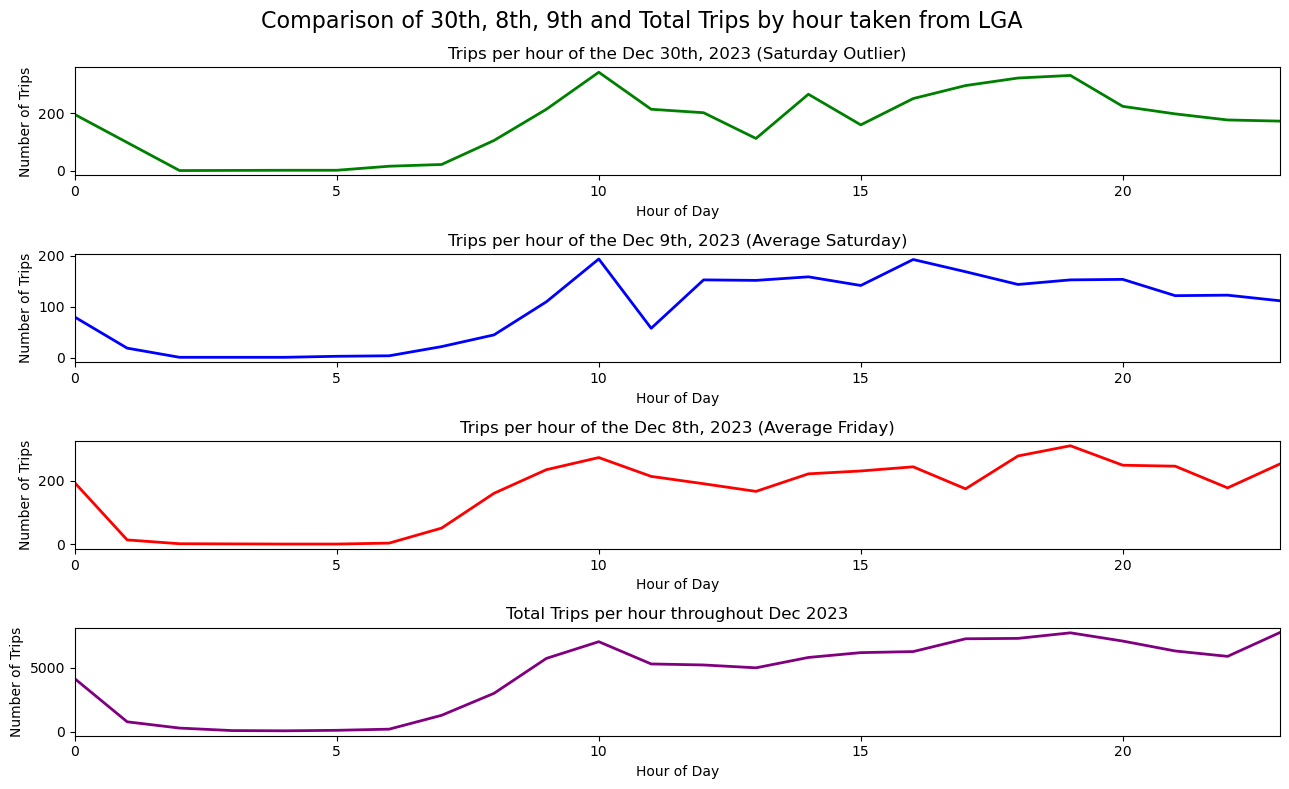

In [168]:
#plot for comparing the average Friday (8th) and Saturday (9th) to the Outlying Saturday (30th)
# and the total trips per hour in December
figure, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4)
figure.suptitle("Comparison of 30th, 8th, 9th and Total Trips by hour taken from LGA ", fontsize=16)

#December 30th Outlying Saturday
nye_eve=lga_df.copy()
dt=nye_eve.loc["2023-12-30 00:00:00":"2023-12-30 23:59:59"]
dt.groupby(dt.index.hour)['dropoff_datetime'].count().plot(figsize=(13, 8), color="green", linewidth=2, ax=ax1)
ax1.set_title("Trips per hour of the Dec 30th, 2023 (Saturday Outlier)")
ax1.set_ylabel("Number of Trips")
ax1.set_xlabel("Hour of Day")
ax1.set_xlim(lga_df.index.hour.min(), lga_df.index.hour.max())

#December 9th Average Saturday
pu_lga_df2=lga_df.copy()
dead_time=pu_lga_df2.loc["2023-12-09 00:00:00":"2023-12-09 23:59:59"]
dead_time.groupby(dead_time.index.hour)['dropoff_datetime'].\
    count().plot(figsize=(13, 8), color="blue", linewidth=2, ax=ax2)
ax2.set_title("Trips per hour of the Dec 9th, 2023 (Average Saturday)")
ax2.set_xlabel("Hour of Day")
ax2.set_ylabel("Number of Trips")
ax2.set_xlim(lga_df.index.hour.min(), lga_df.index.hour.max())

#December 8th Average Friday
pu_lga_df3=lga_df.copy()
dead_time1=pu_lga_df3.loc["2023-12-08 00:00:00":"2023-12-08 23:59:59"]
dead_time1.groupby(dead_time1.index.hour)['dropoff_datetime'].\
    count().plot(figsize=(13, 8), color="red", linewidth=2, ax=ax3)
ax3.set_title("Trips per hour of the Dec 8th, 2023 (Average Friday)")
ax3.set_xlabel("Hour of Day")
ax3.set_ylabel("Number of Trips")
ax3.set_xlim(lga_df.index.hour.min(), lga_df.index.hour.max())

#All of December
pu_lga_df=lga_df.copy()
pu_lga_df.reset_index(inplace=True)
pu_lga_df.groupby(lga_df.index.hour)["pickup_datetime"].count().plot(figsize=(13, 8), color="purple", linewidth=2, ax=ax4)
ax4.set_title("Total Trips per hour throughout Dec 2023")
ax4.set_xlabel("Hour of Day")
ax4.set_ylabel("Number of Trips")
ax4.set_xlim(lga_df.index.hour.min(), lga_df.index.hour.max())

figure.tight_layout()

In [229]:
# The Total Trips for Dec 30th, 9th, and 8th that are the respective Saturday Outlier, Average Saturday, and Average Friday
print("Total Trips Dec 30th:" , dt['dropoff_datetime'].count())

print("Total Trips Dec 9th:" , dead_time['dropoff_datetime'].count())

print("Total Trips 8th:" , dead_time1['dropoff_datetime'].count())



Total Trips Dec 30th: 3811
Total Trips Dec 9th: 2313
Total Trips 8th: 3877


In [230]:
#Comparing the total trips and Total passenger costs between LGA and JFK
print("Total Trips in December from LGA:" ,lga_df['dropoff_datetime'].count())
print("Total Trips in December from JFK:" ,jfk_df['dropoff_datetime'].count())

print("Total Money Flow in December from LGA:" , round(lga_df['Total_Passenger_Cost'].sum(), 2))
print("Total Money Flow in December from JFK:" ,round(jfk_df['Total_Passenger_Cost'].sum(), 2) )

Total Trips in December from LGA: 106243
Total Trips in December from JFK: 96851
Total Money Flow in December from LGA: 6861180.72
Total Money Flow in December from JFK: 7382022.21


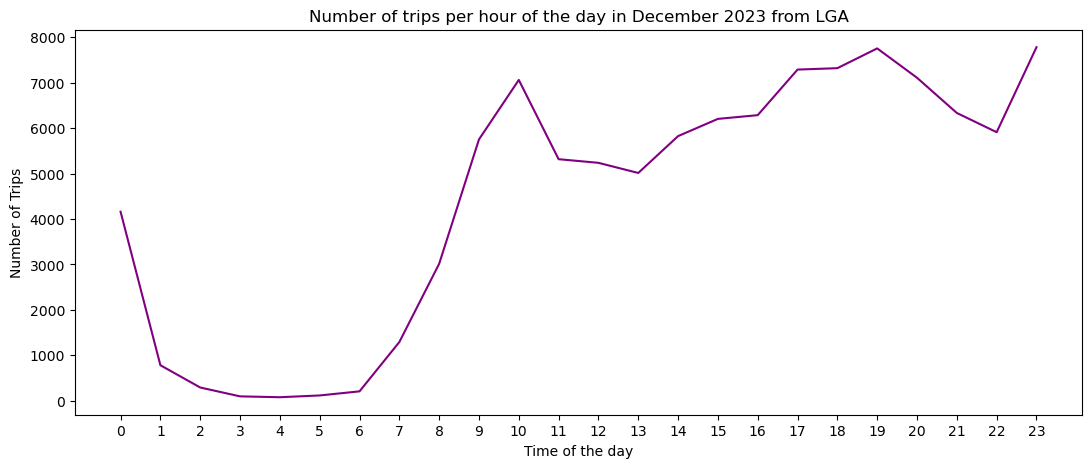

In [55]:
#All of December trip per hour of day on its own plot
pu_lga_df=lga_df.copy()
pu_lga_df.reset_index(inplace=True)
pu_lga_df.groupby(lga_df.index.hour)["pickup_datetime"].count()

Operating Hours of Terminal B of LGA are 4am to 12am, no hours could be found for Terminal A and C so we will assume they operate on the same time frame. The graph above shows the total number of trips per hour for the month of December in 2023. From 4am to 6am, there is a low amount of taxi departures due to the beginning of the peak hours is at 6am. It can be assumed that the taxis taking people between 12am to 6am are taking employees that work 2nd and 3rd shift. 

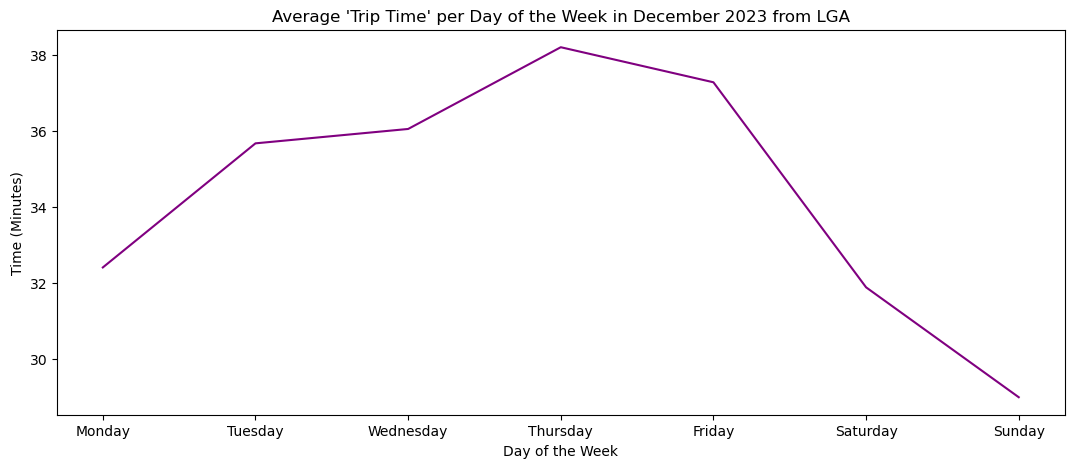

In [177]:
#Plot of Average trip_time of day of week in December 2023
lga_df.groupby(lga_df.index.dayofweek)["trip_time"].mean().plot(figsize=(13, 5), color="purple")
plt.title("Average 'Trip Time' per Day of the Week in December 2023 from LGA")
plt.xlabel("Day of the Week")
plt.ylabel("Time (Minutes)")
plt.xticks(np.arange(0, 7, 1), ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

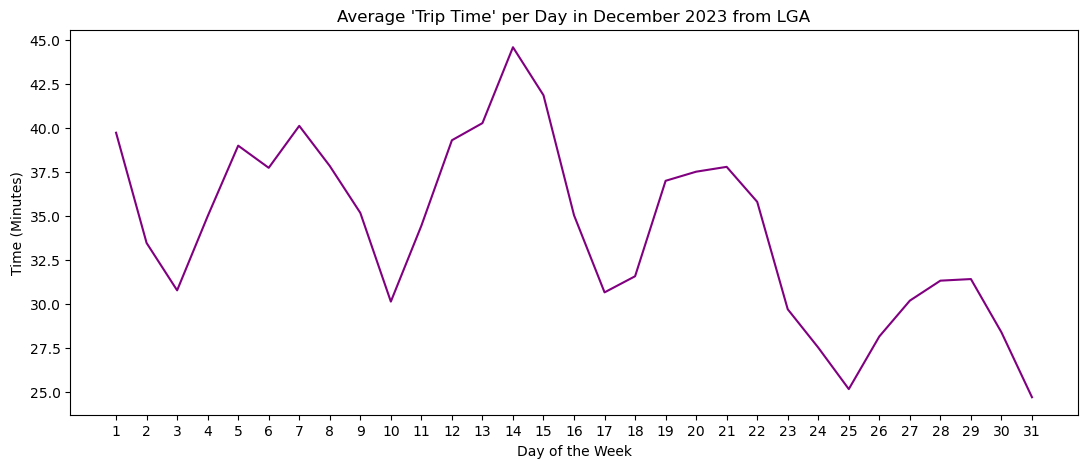

In [178]:
#Plot of Average trip_time for each day in December 2023 
lga_df.groupby(lga_df.index.day)["trip_time"].mean().plot(figsize=(13, 5), color="purple")
plt.title("Average 'Trip Time' per Day in December 2023 from LGA")
plt.xlabel("Day of the Week")
plt.ylabel("Time (Minutes)")
plt.xticks(np.arange(1, 32, 1))
plt.show()

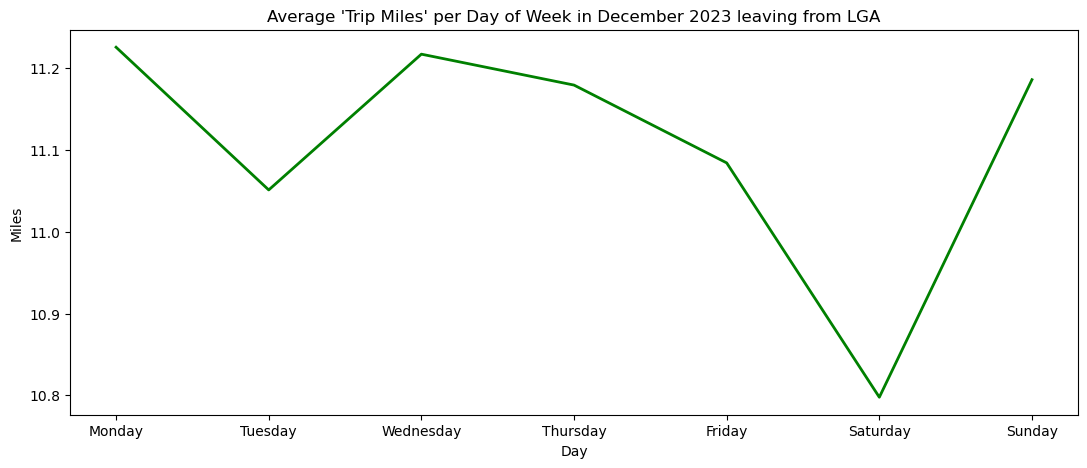

In [145]:
#Plot of Average trip_miles of day of week in December 2023
lga_df.groupby(lga_df.index.dayofweek)["trip_miles"].mean().plot(figsize=(13, 5), color="green", linewidth=2)
plt.title("Average 'Trip Miles' per Day of Week in December 2023 leaving from LGA")
plt.xlabel("Day")
plt.ylabel("Miles")
plt.xticks(np.arange(0, 7, 1), ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

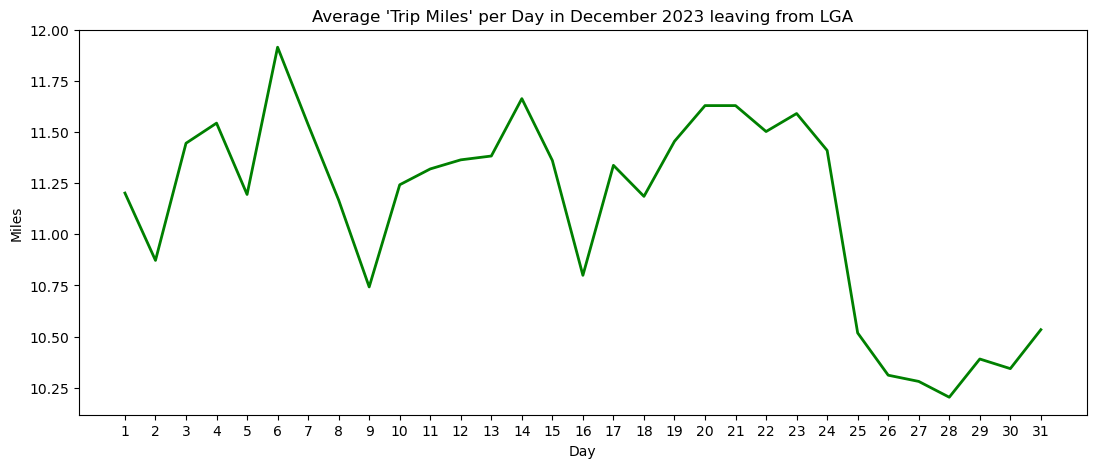

In [136]:
#Plot of Average trip_miles for each day in December 2023 
lga_df.groupby(lga_df.index.day)["trip_miles"].mean().plot(figsize=(13, 5), color="green", linewidth=2)
plt.title("Average 'Trip Miles' per Day in December 2023 leaving from LGA")
plt.xlabel("Day")
plt.ylabel("Miles")
plt.xticks(np.arange(1, 32, 1))
plt.show()

A correlation of average Trip Miles and number of trips from LGA can be seen.
However with Average trip miles, the 25th to the 31st has the lowest miles compared to the rest of the month. Possibly due to the end of year holiday season.  

Text(0, 0.5, 'Miles')

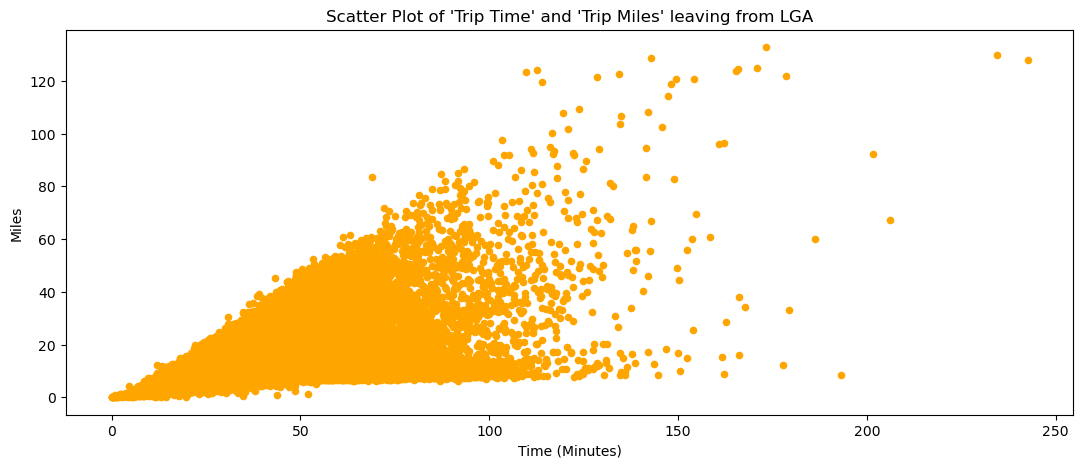

In [18]:
# scatter plot for trip time and trip miles
lga_df.plot.scatter(x="trip_time", y="trip_miles", figsize=(13, 5), color="orange") 
plt.title("Scatter Plot of 'Trip Time' and 'Trip Miles' leaving from LGA")
plt.xlabel("Time (Minutes)")
plt.ylabel("Miles")


In [25]:
# Correlation coefficient matrix of the numerical data in dataframe
corr_df=lga_df[["trip_miles",	"trip_time",	"base_passenger_fare", "tolls",	"bcf",	"sales_tax",	"congestion_surcharge",	"airport_fee","tips",	"driver_pay","Total_Passenger_Cost"]]
corr_df.corr()

,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
trip_miles,1.000000,0.534648,0.845570,0.366393,0.811450,0.248806,-0.131829,0.039771,0.236414,0.867179,0.797174
trip_time,0.534648,1.000000,0.713074,0.300603,0.698331,0.447894,0.220819,0.024429,0.276836,0.830011,0.718029
base_passenger_fare,0.845570,0.713074,1.000000,0.385791,0.958808,0.490966,0.032682,0.007989,0.320458,0.922945,0.964412
tolls,0.366393,0.300603,0.385791,1.000000,0.531656,-0.127535,0.151623,-0.024595,0.124713,0.375853,0.501069
bcf,0.811450,0.698331,0.958808,0.531656,1.000000,0.462588,0.096108,0.022166,0.319601,0.889373,0.958442
sales_tax,0.248806,0.447894,0.490966,-0.127535,0.462588,1.000000,0.317870,-0.011642,0.231601,0.420743,0.500470
congestion_surcharge,-0.131829,0.220819,0.032682,0.151623,0.096108,0.317870,1.000000,-0.091428,0.085403,0.044274,0.134953
airport_fee,0.039771,0.024429,0.007989,-0.024595,0.022166,-0.011642,-0.091428,1.000000,-0.022829,0.029624,0.008721
tips,0.236414,0.276836,0.320458,0.124713,0.319601,0.231601,0.085403,-0.022829,1.000000,0.312287,0.506059
driver_pay,0.867179,0.830011,0.922945,0.375853,0.889373,0.420743,0.044274,0.029624,0.312287,1.000000,0.895760


Text(0, 0.5, 'Number of Trips')

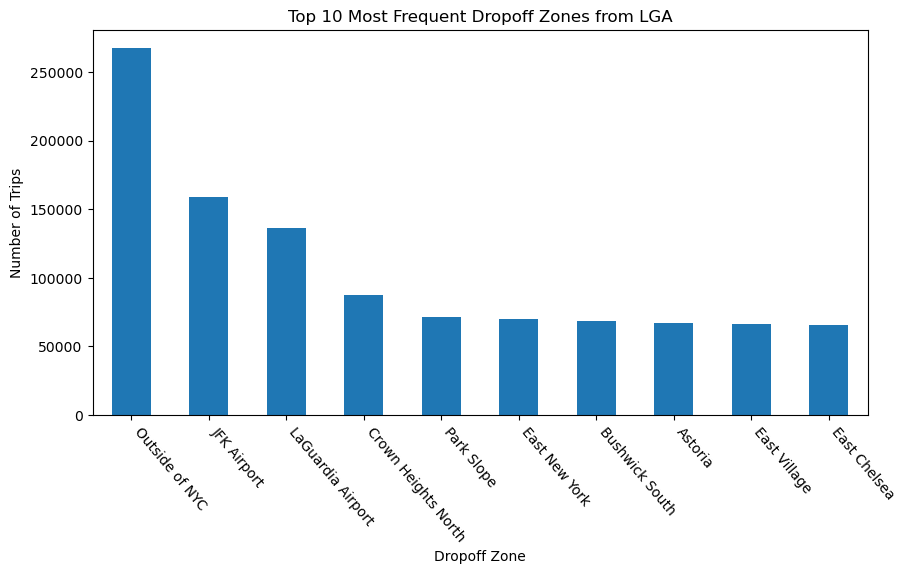

In [19]:
# Plot the top 10 most frequent dropoff zones.
full_lga_locations_df["Dropoff_Zone"]\
    .value_counts().head(10).plot(kind="bar",
                                   title="Top 10 Most Frequent Dropoff Zones from LGA",
                                     figsize=(10, 5))
plt.xticks(rotation=310, ha="left")
plt.xlabel("Dropoff Zone")
plt.ylabel("Number of Trips")

Text(0, 0.5, '')

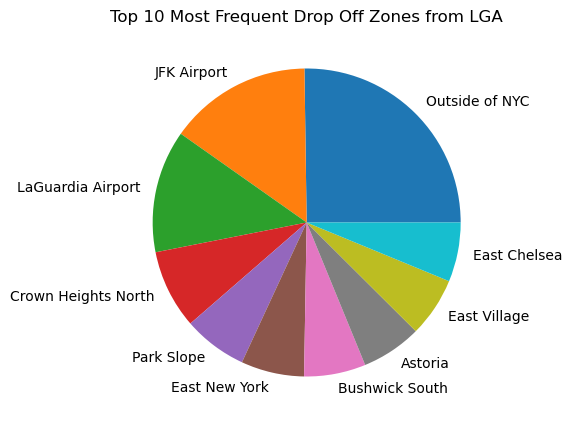

In [199]:
# Plot the top 10 most frequent pickup zones as a pie chart.
full_lga_locations_df["Dropoff_Zone"].value_counts().head(10).plot(kind="pie", title="Top 10 Most Frequent Drop Off Zones from LGA", figsize=(10, 5))
plt.xticks(rotation=310, ha="left")
plt.xlabel(None)
plt.ylabel(None)

In [127]:
#Top 15 drop off zones by Total Passenger Costs

borough_dropoff_costs = full_lga_locations_df.groupby(["Dropoff_Borough", "Dropoff_Zone"])[["Total_Passenger_Cost"]].sum()
borough_dropoff_costs = borough_dropoff_costs.sort_values(by="Total_Passenger_Cost", ascending=False)
borough_dropoff_costs.head(15)

Total_Passenger_Cost
Dropoff_Borough Dropoff_Zone                                      
Manhattan       Times Sq/Theatre District                363663.44
                Midtown South                            170503.13
                Clinton East                             156557.83
                Midtown Center                           153966.46
                Midtown East                             123481.55
                East Chelsea                             123372.01
                Midtown North                            120007.29
Queens          JFK Airport                              109721.60
Manhattan       Murray Hill                              102313.99
                Garment District                          98284.96
                Financial District North                  93504.83
                Penn Station/Madison Sq West              84442.60
                East Village                              82847.89
Brooklyn        Park Slope                                81513.23
Manhattan       Flatiron                                  79561.99

In [128]:
#Top 15 drop off zones by base passenger fare
base_borough_dropoff_costs = full_lga_locations_df.groupby(["Dropoff_Borough", "Dropoff_Zone"])[["base_passenger_fare"]].sum()
base_borough_dropoff_costs = base_borough_dropoff_costs.sort_values(by="base_passenger_fare", ascending=False)
base_borough_dropoff_costs.head(15)

base_passenger_fare
Dropoff_Borough Dropoff_Zone                                     
Manhattan       Times Sq/Theatre District               251929.21
                Midtown South                           113477.24
                Clinton East                            108826.16
                Midtown Center                          106919.49
                Midtown North                            84922.93
Queens          JFK Airport                              84830.97
Manhattan       East Chelsea                             84094.11
                Midtown East                             84016.67
                Murray Hill                              67604.83
                Financial District North                 67353.91
                Garment District                         66276.41
Brooklyn        Park Slope                               64487.82
Manhattan       East Village                             59836.31
                Penn Station/Madison Sq West             56799.81
                Flatiron                                 54520.19

Text(0, 0.5, 'Average Tip $')

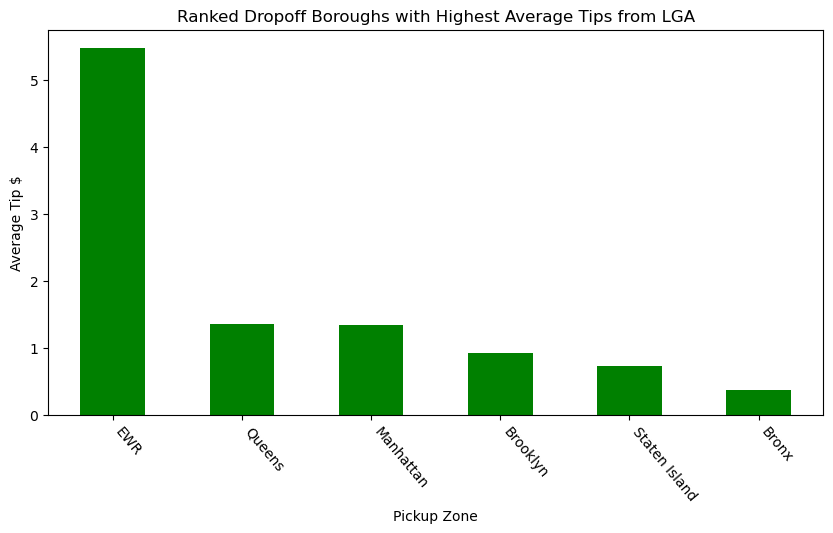

In [231]:
# Plot the highest average tip dropoff boroughs. EWR is the code name for Newark Airport.
full_lga_locations_df.groupby(["Dropoff_Borough"])["tips"].mean().sort_values(ascending=False).head(6).plot(kind="bar", title="Ranked Dropoff Boroughs with Highest Average Tips from LGA", figsize=(10, 5), color="green")
plt.xticks(rotation=310, ha="left")
plt.xlabel("Drop Off Borough")
plt.ylabel("Average Tip $")

Text(0, 0.5, 'Average Driver Pay')

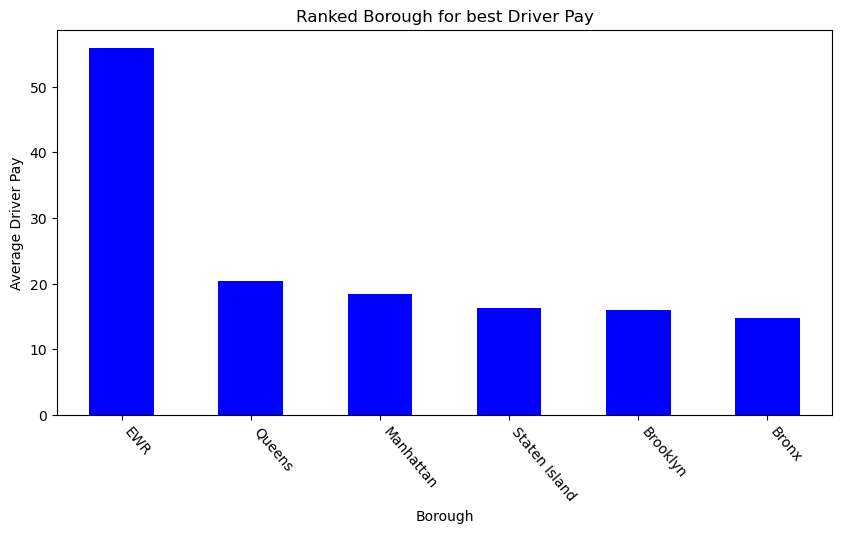

In [233]:
# Plot the ranking profitable pickup zones for drivers.
full_lga_locations_df.groupby(["Dropoff_Borough"])["driver_pay"].mean().sort_values(ascending=False).head(6).plot(kind="bar", title="Ranked Borough for Best Driver Pay", figsize=(10, 5), color="blue")
plt.xticks(rotation=310, ha="left")
plt.xlabel("Borough")
plt.ylabel("Average Driver Pay")

Following values are to see how the mean and median compare without looking at Outside NYC drop off locations

In [201]:
# show the first and last 5 dataframe 
full_lga_locations_df.head()

,pickup_datetime,dropoff_datetime,PULocationID,Pickup_Borough,Pickup_Zone,DOLocationID,Dropoff_Borough,Dropoff_Zone,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
0,2023-12-01 00:00:00,2023-12-01 00:25:06,130,Queens,Jamaica,216,Queens,South Ozone Park,3.882,25.100000,14.17,0.00,0.39,1.26,0.00,0.0,10.0,19.43,25.82
1,2023-12-01 00:00:00,2023-12-01 00:25:31,170,Manhattan,Murray Hill,61,Brooklyn,Crown Heights North,8.530,25.516667,37.25,2.24,1.08,3.48,2.75,0.0,0.0,25.80,46.80
2,2023-12-01 00:00:00,2023-12-01 01:05:08,158,Manhattan,Meatpacking/West Village West,265,NaN,Outside of NYC,18.970,65.133333,59.29,22.44,2.25,0.00,0.00,0.0,0.0,67.70,83.98
3,2023-12-01 00:00:01,2023-12-01 00:19:44,238,Manhattan,Upper West Side North,185,Bronx,Pelham Parkway,10.432,19.716667,28.39,0.24,0.79,2.54,2.75,0.0,0.0,25.00,34.71
4,2023-12-01 00:00:01,2023-12-01 00:22:25,216,Queens,South Ozone Park,61,Brooklyn,Crown Heights North,9.309,22.400000,29.56,0.00,0.81,2.62,0.00,0.0,0.0,25.05,32.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6242666,2023-12-31 23:59:57,2024-01-01 00:16:25,170,Manhattan,Murray Hill,7,Queens,Astoria,4.812,16.466667,49.82,2.52,1.40,4.52,5.50,0.0,0.0,17.48,63.76
6242667,2023-12-31 23:59:58,2024-01-01 00:30:02,259,Bronx,Woodlawn/Wakefield,48,Manhattan,Clinton East,15.115,30.066667,95.84,1.68,2.18,7.02,5.50,0.0,10.0,37.09,122.22
6242668,2023-12-31 23:59:58,2024-01-01 00:18:13,177,Brooklyn,Ocean Hill,62,Brooklyn,Crown Heights South,2.645,18.250000,15.22,0.00,0.42,1.35,0.00,0.0,4.0,13.90,20.99
6242669,2023-12-31 23:59:59,2024-01-01 00:35:05,159,Bronx,Melrose South,219,Queens,Springfield Gardens South,19.934,35.100000,44.94,6.46,0.00,0.00,0.00,0.0,0.0,46.32,51.40


In [209]:
# Copy of dataframe to run separate analysis
lga_nyc_df=lga_df.copy()

In [210]:
# Averages of following numerical data of trips.
lga_mean_values = lga_nyc_df[['trip_miles', 'trip_time', 'base_passenger_fare', 'tolls', 'tips','driver_pay','Total_Passenger_Cost']].mean()
lga_mean_values.round(2)


trip_miles              11.11
trip_time               34.49
base_passenger_fare     47.20
tolls                    3.81
tips                     4.28
driver_pay              36.40
Total_Passenger_Cost    64.58
dtype: float64

In [211]:
# Medians of following numerical data of trips.
lga_median_values = lga_nyc_df[['trip_miles', 'trip_time', 'base_passenger_fare', 'tolls', 'tips','driver_pay','Total_Passenger_Cost']].median()
lga_median_values.round(2)

trip_miles               9.54
trip_time               30.93
base_passenger_fare     42.90
tolls                    3.67
tips                     0.00
driver_pay              32.78
Total_Passenger_Cost    59.65
dtype: float64

In [213]:
# Standard Deviations of following numerical data of trips.
lga_std_values = lga_nyc_df[['trip_miles', 'trip_time', 'base_passenger_fare', 'tolls', 'tips','driver_pay','Total_Passenger_Cost']].std()
lga_std_values.round(2)

trip_miles               7.42
trip_time               17.26
base_passenger_fare     24.07
tolls                    5.11
tips                     6.52
driver_pay              19.84
Total_Passenger_Cost    31.00
dtype: float64

In [214]:
# Checking on if the data sets are skewed to the right or left
lga_mean_values/lga_median_values

trip_miles              1.498045
trip_time               1.998319
base_passenger_fare     1.961365
tolls                   0.745342
tips                    0.656396
driver_pay              1.834875
Total_Passenger_Cost    2.082941
dtype: float64

The following are the histograms of the numerical data of Lyft trips from LGA

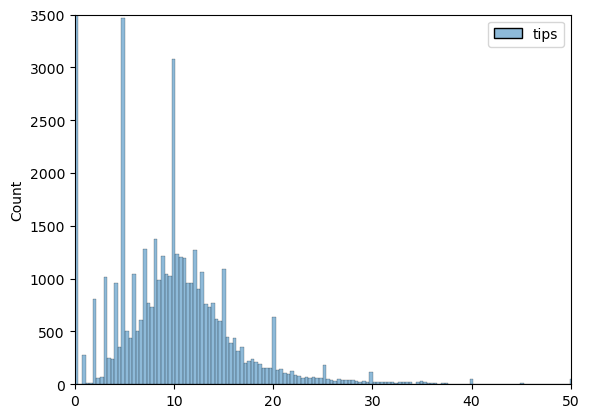

In [234]:
# Distribution of tips given
fig, ax=plt.subplots()
sns.histplot(lga_df[["tips"]])

ax.set_xlim(0,50)
ax.set_ylim(0,3500)
plt.show()



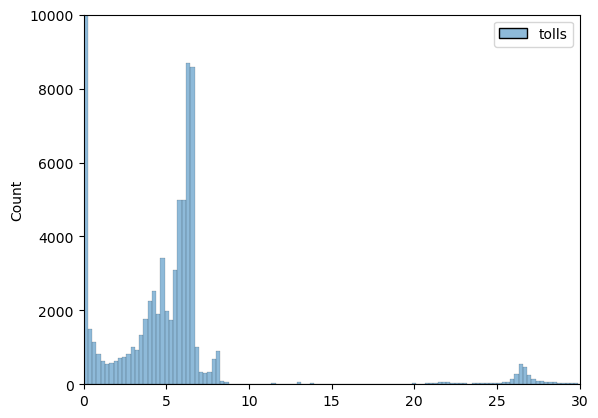

In [218]:
# Distribution of tolls paid 
fig, ax=plt.subplots()
sns.histplot(lga_df[["tolls"]])

ax.set_xlim(0,30)
ax.set_ylim(0,10000)
plt.show()


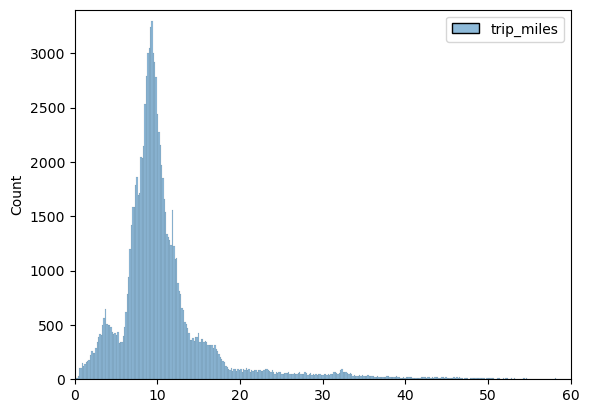

In [221]:
#distribution of trip_miles
fig, ax=plt.subplots()
sns.histplot(lga_df[["trip_miles"]])

ax.set_xlim(0,60)
ax.set_ylim(0,3400)
plt.show()

<Axes: ylabel='Count'>

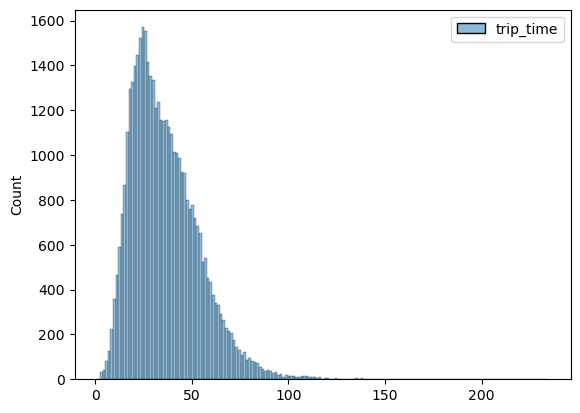

In [128]:
#Distribution of trip_time
sns.histplot(lga_df[["trip_time"]])

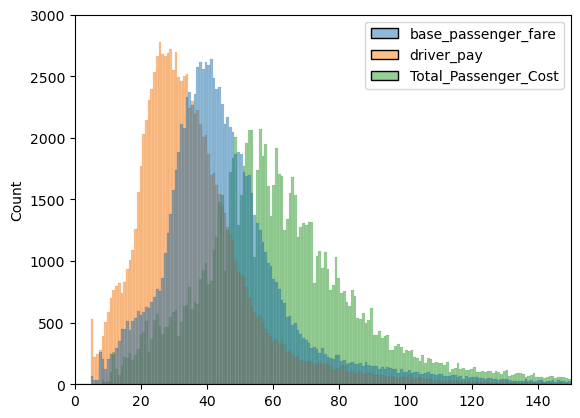

In [241]:
#Distribution of base_passenger_fare,driver_pay, and Total_Passenger_Cost
fig, ax=plt.subplots()
sns.histplot(lga_df[["base_passenger_fare","driver_pay","Total_Passenger_Cost"]])

ax.set_xlim(0,150)
ax.set_ylim(0,3000)
plt.show()


